In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
#loading the dataset
df=pd.read_csv("titanic_dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#PassengerId as the index column
df=df.set_index('PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Basic info about dataset

In [4]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Filling in missing values

In [7]:
df=df.drop('Cabin',axis=1)    
df.fillna(df['Age'].mean(),inplace=True)
df.fillna(df['Embarked'].mode(),inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [8]:
#removing unnecessary columns
df.drop(['Name','Ticket'],axis=1,inplace=True)      
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


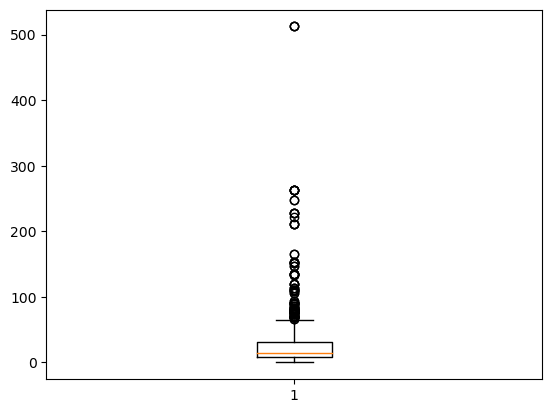

In [9]:
plt.boxplot(df['Fare'])
plt.show()

In [10]:
Q1=df['Fare'].quantile(0.25)
Q3=df['Fare'].quantile(0.75)
IQR=Q3-Q1
upper=Q3+1.5*IQR
lower=Q1-1.5*IQR

In [11]:
outlier=[]
for x in df['Fare']:
    if((x>upper) or (x<lower)):
        outlier.append(x)
df['Fare']=np.where(df['Fare']>upper,upper,np.where(df['Fare']<lower,lower,df['Fare']))

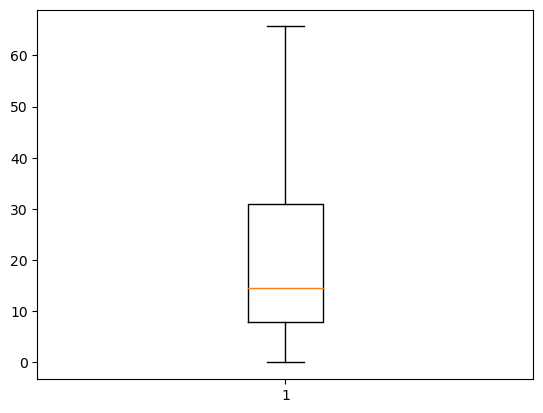

In [12]:
plt.boxplot(df['Fare'])
plt.show()

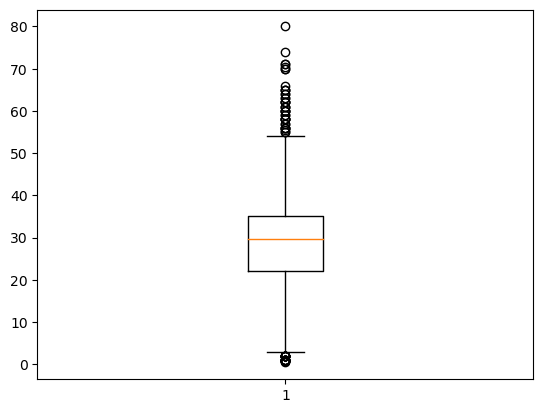

In [13]:
plt.boxplot(df['Age'])
plt.show()

In [14]:
Q1=df['Age'].quantile(0.25)
Q3=df['Age'].quantile(0.75)
IQR=Q3-Q1
upper=Q3+1.5*IQR
lower=Q1-1.5*IQR

In [15]:
outlier=[]
for x in df['Age']:
    if((x>upper) or (x<lower)):
        outlier.append(x)
df['Age']=np.where(df['Age']>upper,upper,np.where(df['Age']<lower,lower,df['Age']))

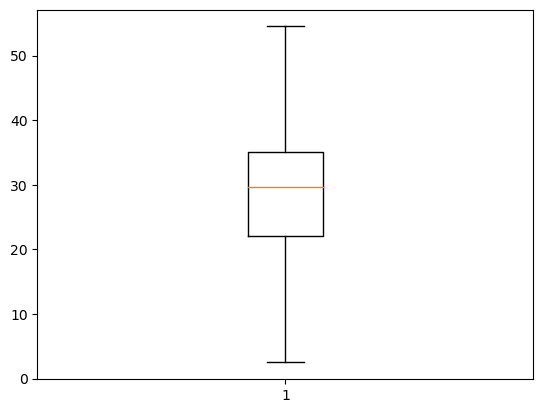

In [16]:
plt.boxplot(df['Age'])
plt.show()

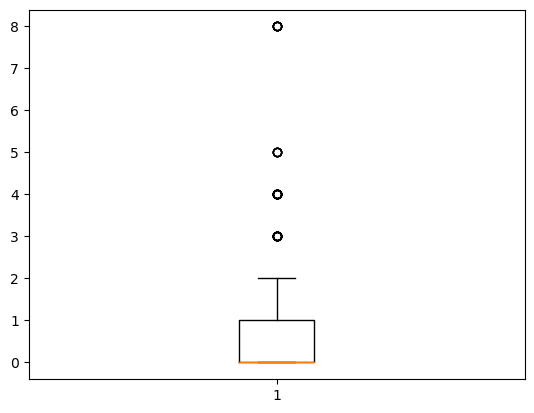

In [17]:
plt.boxplot(df['SibSp'])
plt.show()

In [18]:
Q1=df['SibSp'].quantile(0.25)
Q3=df['SibSp'].quantile(0.75)
IQR=Q3-Q1
upper=Q3+1.5*IQR
lower=Q1-1.5*IQR

In [19]:
outlier=[]
for x in df['SibSp']:
    if((x>upper) or (x<lower)):
        outlier.append(x)
df['SibSp']=np.where(df['SibSp']>upper,upper,np.where(df['SibSp']<lower,lower,df['SibSp']))

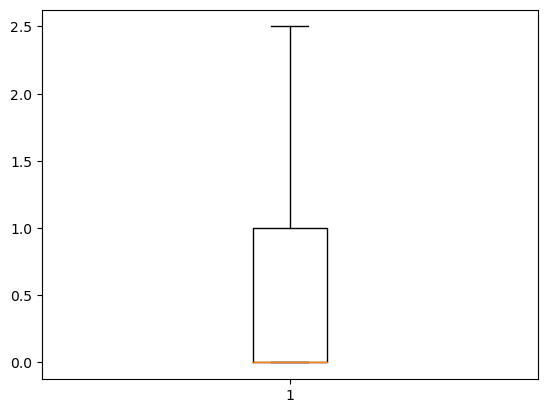

In [20]:
plt.boxplot(df['SibSp'])
plt.show()

In [21]:
df=pd.get_dummies(df)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_29.69911764705882,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
1,0,3,22.0,1.0,0,7.2500,0,1,0,0,0,1
2,1,1,38.0,1.0,0,65.6344,1,0,0,1,0,0
3,1,3,26.0,0.0,0,7.9250,1,0,0,0,0,1
4,1,1,35.0,1.0,0,53.1000,1,0,0,0,0,1
5,0,3,35.0,0.0,0,8.0500,0,1,0,0,0,1


In [22]:
df.drop(['Sex_male','Embarked_29.69911764705882','Embarked_S'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Embarked_C,Embarked_Q
PassengerId,,,,,,,,,
1,0,3,22.0,1.0,0,7.2500,0,0,0
2,1,1,38.0,1.0,0,65.6344,1,1,0
3,1,3,26.0,0.0,0,7.9250,1,0,0
4,1,1,35.0,1.0,0,53.1000,1,0,0
5,0,3,35.0,0.0,0,8.0500,0,0,0


In [23]:
y=df['Survived']
x=df.drop('Survived',axis=1)
x.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Embarked_C,Embarked_Q
PassengerId,,,,,,,,
1,3,22.0,1.0,0,7.2500,0,0,0
2,1,38.0,1.0,0,65.6344,1,1,0
3,3,26.0,0.0,0,7.9250,1,0,0
4,1,35.0,1.0,0,53.1000,1,0,0
5,3,35.0,0.0,0,8.0500,0,0,0


In [24]:
x.dtypes

Pclass          int64
Age           float64
SibSp         float64
Parch           int64
Fare          float64
Sex_female      uint8
Embarked_C      uint8
Embarked_Q      uint8
dtype: object

In [25]:
scaler=MinMaxScaler()
for i in ['Age', 'Fare','Parch','SibSp','Pclass']:
    x[i]=scaler.fit_transform(x)
    
x=pd.DataFrame(x)
x.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Embarked_C,Embarked_Q
PassengerId,,,,,,,,
1,1.0,1.0,1.0,1.0,1.0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,1,1,0
3,1.0,1.0,1.0,1.0,1.0,1,0,0
4,0.0,0.0,0.0,0.0,0.0,1,0,0
5,1.0,1.0,1.0,1.0,1.0,0,0,0
